In [1]:
from keras.preprocessing.image import ImageDataGenerator


In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [3]:
x_train=train_datagen.flow_from_directory(r'C:\Users\karth\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set',target_size=(128,128),batch_size=24,class_mode='categorical')
x_test=test_datagen.flow_from_directory(r'C:\Users\karth\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set',target_size=(128,128),batch_size=24,class_mode='categorical')

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [5]:
model=Sequential()

In [6]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))


In [7]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [12]:
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [13]:
len(x_train)

475

In [14]:
model.fit(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_train))

Epoch 1/10
475/475 [==============================] - 337s 706ms/step - loss: 2.1607 - accuracy: 0.1793 - val_loss: 2.1008 - val_accuracy: 0.1953
Epoch 2/10
475/475 [==============================] - 172s 362ms/step - loss: 2.0899 - accuracy: 0.1868
Epoch 3/10
475/475 [==============================] - 172s 363ms/step - loss: 2.0777 - accuracy: 0.1868
Epoch 4/10
475/475 [==============================] - 177s 372ms/step - loss: 2.0747 - accuracy: 0.1868
Epoch 5/10
475/475 [==============================] - 173s 363ms/step - loss: 2.0738 - accuracy: 0.1868
Epoch 6/10
475/475 [==============================] - 172s 362ms/step - loss: 2.0735 - accuracy: 0.1868
Epoch 7/10
475/475 [==============================] - 175s 368ms/step - loss: 2.0733 - accuracy: 0.1868
Epoch 8/10
475/475 [==============================] - 182s 383ms/step - loss: 2.0733 - accuracy: 0.1868
Epoch 9/10
475/475 [==============================] - 182s 382ms/step - loss: 2.0733 - accuracy: 0.1868
Epoch 10/10
475/475 [=

In [15]:
model.save('vegetabledata.h5')

In [16]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [17]:
model=load_model('vegetabledata.h5')


In [18]:
img=image.load_img(r"C:\Users\karth\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Tomato___Bacterial_spot\b6d72c2e-9e41-4215-af23-8e84d94d839f___UF.GRC_BS_Lab Leaf 9065.JPG")

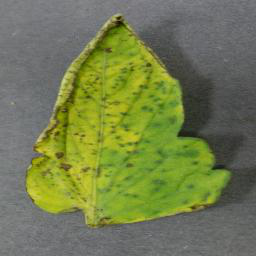

In [19]:
img

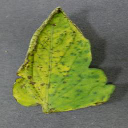

In [20]:
img=image.load_img(r"C:\Users\karth\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Tomato___Bacterial_spot\b6d72c2e-9e41-4215-af23-8e84d94d839f___UF.GRC_BS_Lab Leaf 9065.JPG",target_size=(128,128))
img

In [21]:
x=image.img_to_array(img)

In [22]:
x


array([[[125., 126., 128.],
        [126., 127., 129.],
        [124., 125., 127.],
        ...,
        [118., 119., 123.],
        [116., 117., 121.],
        [110., 111., 115.]],

       [[126., 127., 129.],
        [126., 127., 129.],
        [123., 124., 126.],
        ...,
        [115., 116., 120.],
        [115., 116., 120.],
        [112., 113., 117.]],

       [[129., 130., 132.],
        [127., 128., 130.],
        [121., 122., 124.],
        ...,
        [119., 120., 124.],
        [119., 120., 124.],
        [117., 118., 122.]],

       ...,

       [[121., 123., 122.],
        [128., 130., 129.],
        [123., 125., 124.],
        ...,
        [ 99.,  99.,  97.],
        [103., 103., 101.],
        [109., 109., 107.]],

       [[115., 117., 116.],
        [112., 114., 113.],
        [109., 111., 110.],
        ...,
        [111., 111., 109.],
        [111., 111., 109.],
        [107., 107., 105.]],

       [[119., 121., 120.],
        [121., 123., 122.],
        [123., 1

In [23]:
x=np.expand_dims(x,axis=0)

In [24]:
x

array([[[[125., 126., 128.],
         [126., 127., 129.],
         [124., 125., 127.],
         ...,
         [118., 119., 123.],
         [116., 117., 121.],
         [110., 111., 115.]],

        [[126., 127., 129.],
         [126., 127., 129.],
         [123., 124., 126.],
         ...,
         [115., 116., 120.],
         [115., 116., 120.],
         [112., 113., 117.]],

        [[129., 130., 132.],
         [127., 128., 130.],
         [121., 122., 124.],
         ...,
         [119., 120., 124.],
         [119., 120., 124.],
         [117., 118., 122.]],

        ...,

        [[121., 123., 122.],
         [128., 130., 129.],
         [123., 125., 124.],
         ...,
         [ 99.,  99.,  97.],
         [103., 103., 101.],
         [109., 109., 107.]],

        [[115., 117., 116.],
         [112., 114., 113.],
         [109., 111., 110.],
         ...,
         [111., 111., 109.],
         [111., 111., 109.],
         [107., 107., 105.]],

        [[119., 121., 120.],
       

In [25]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 281ms/step


In [26]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [27]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']


In [28]:
index[y[0]]

'Tomato___Bacterial_spot'

In [29]:
img=image.load_img(r"C:\Users\karth\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Tomato___Bacterial_spot\b6d72c2e-9e41-4215-af23-8e84d94d839f___UF.GRC_BS_Lab Leaf 9065.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]


1/1 [==============================] - 0s 35ms/step


'Tomato___Bacterial_spot'